# Aufgabe 3

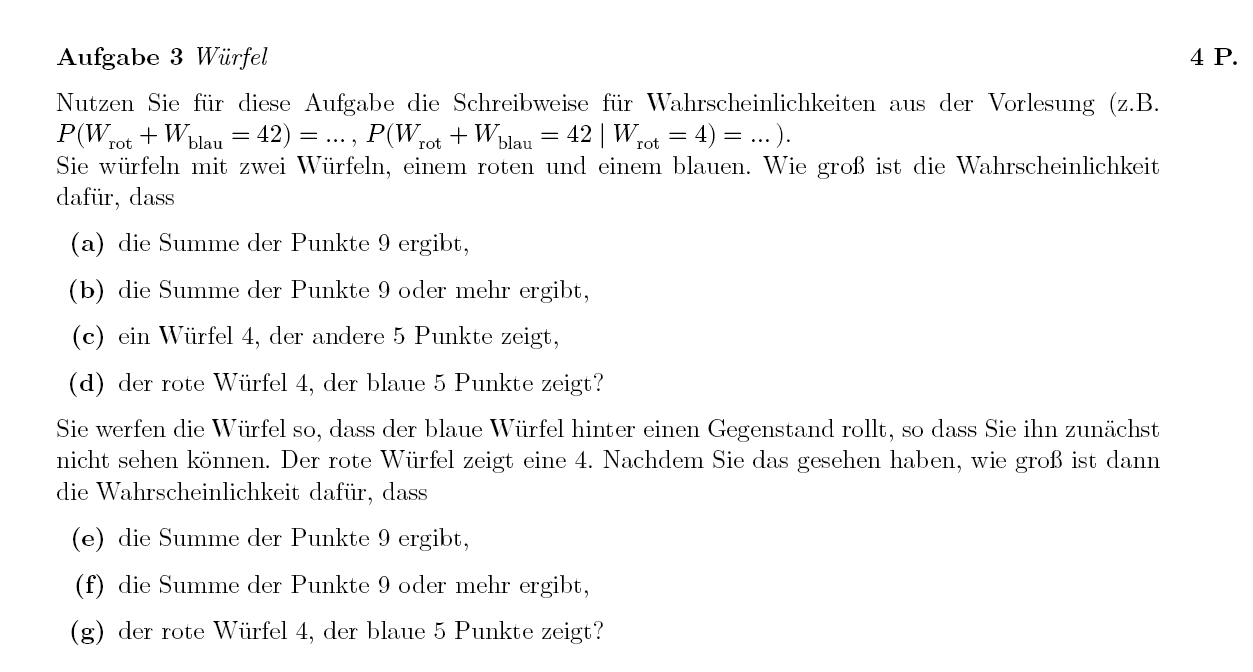

# Aufgabe 4

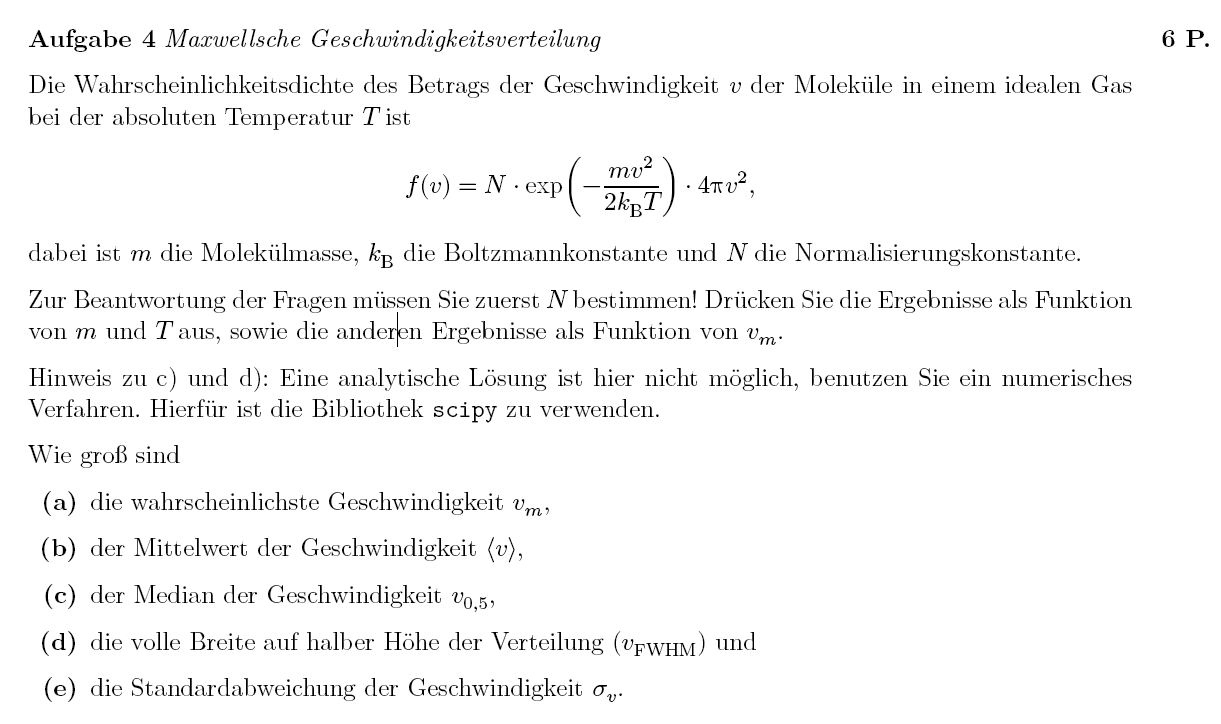

In [1]:
import numpy as np
from numpy import pi,sqrt,exp
from scipy.special import erf
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar
import matplotlib as mpl

mpl.rcParams['font.size'] = 16

### Plot der Verteilung

In [2]:
def f(v,beta):
    return 4/sqrt(pi)*beta**(3/2)*v**2*exp(-beta*v**2)

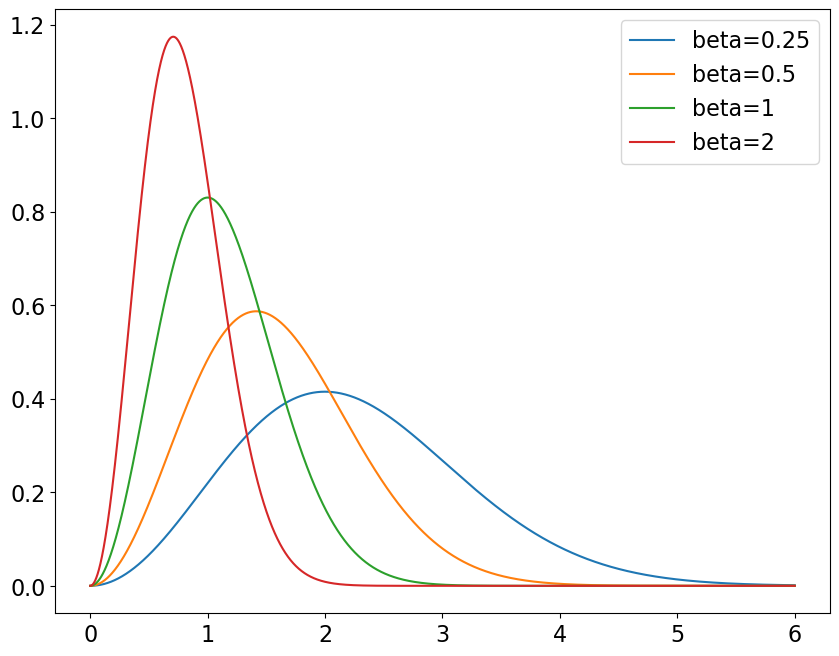

In [3]:
beta = [0.25,0.5,1,2]
colors = [f'C{i}' for i,beta in enumerate(beta)]
v = np.linspace(0,6,100000)

def plot_function():
    plt.figure(figsize=(10,8),dpi=100)

    for beta_i,color in zip(beta,colors):
        plt.plot(v,f(v,beta_i),color=color,label=f'beta={beta_i}')


    plt.legend()
    
plot_function()

### a)


In [4]:
def v_m(beta):
    return 1/sqrt(beta)

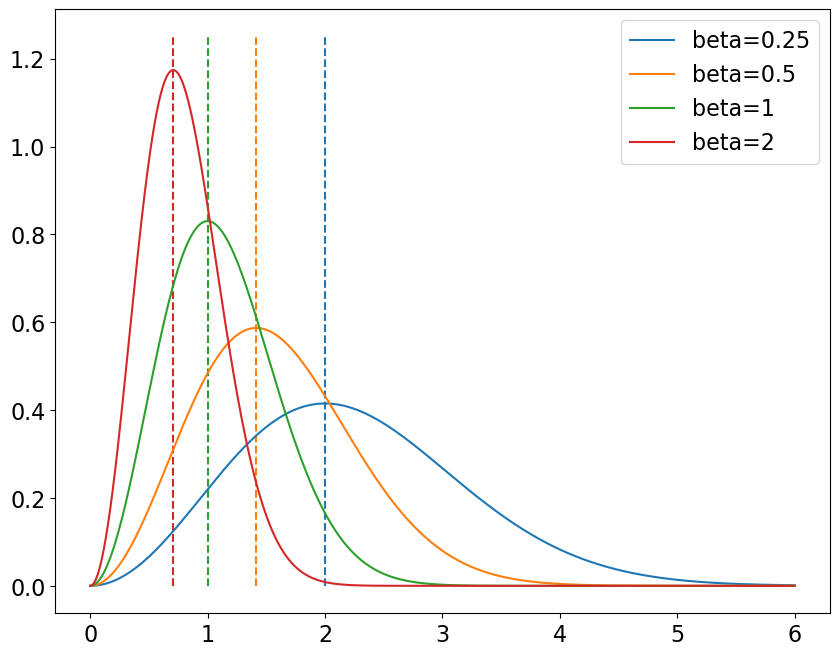

In [5]:
plot_function()
for beta_i, color in zip(beta,colors):
    plt.vlines(v_m(beta_i),0,1.25,linestyle='--',color=color)

### b)

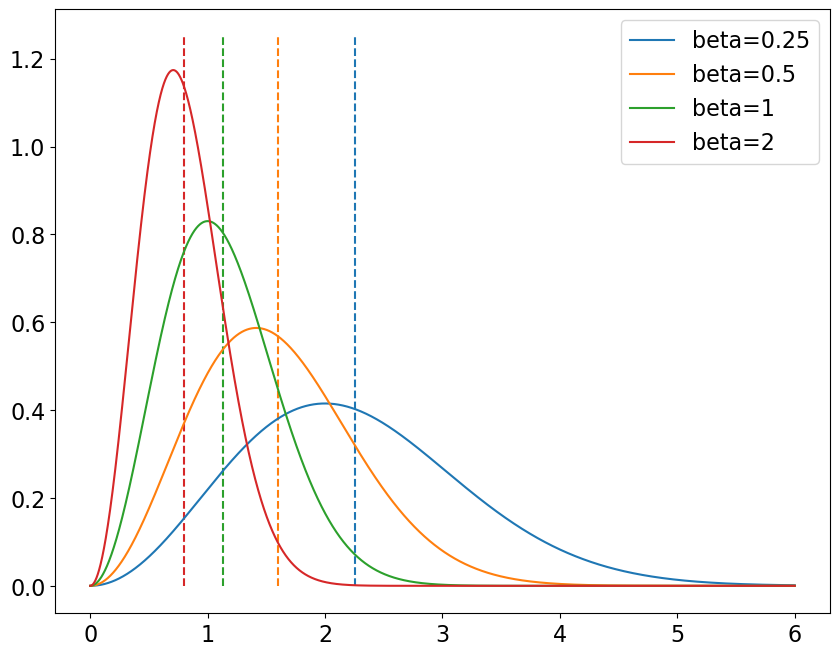

In [6]:
def v_E(beta):
    return 2/sqrt(pi)/sqrt(beta)

plot_function()
for beta_i,color in zip(beta,colors):
    plt.vlines(v_E(beta_i),0,1.25,linestyle='--',color=color)

### c)  

Finde numerisch die Nullstelle:
$$
    g(u_{1/2}) = \frac{2}{\sqrt{\pi}}u_{1/2} \exp (- u_{1/2}^2)-\frac{1}{2}- \text{erf} (u_{1/2}) = 0
$$


In [7]:
def g(u):
    return 2/sqrt(pi)*u*exp(-u**2)-1/2-erf(u)

result_c = root_scalar(g,x0=-10,x1=10)
print(result_c)

      converged: True
           flag: 'converged'
 function_calls: 10
     iterations: 9
           root: -1.0876520317582268


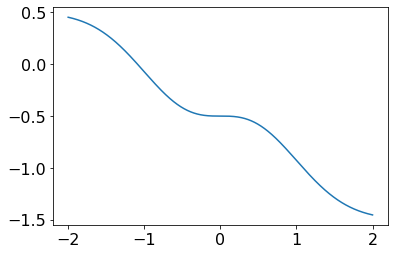

In [8]:
u = np.linspace(-2,2,100000)
plt.plot(u,g(u))

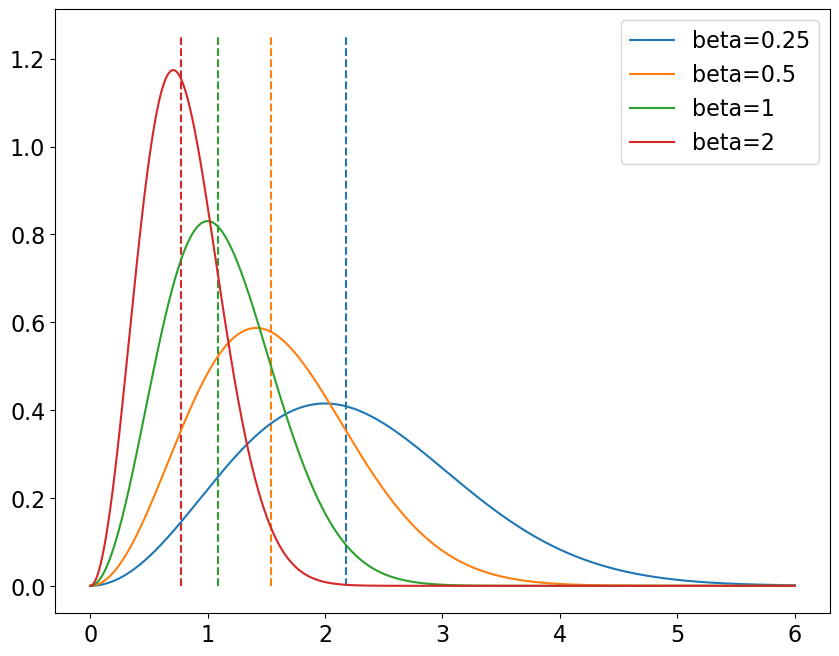

In [9]:
def v_05(beta):
    return 1/sqrt(beta)*result_c.root*(-1)

plot_function()

for beta_i, color in zip(beta,colors):
    plt.vlines(v_05(beta_i),0,1.25,linestyle='--',color=color)

### d)

Finde numerisch die Nullstelle:
$$
    h(u_W) = u_W \exp(-u_W) - \frac{1}{2} \exp(-1) = 0
$$

In [10]:
def h(u):
    return u**2*exp(-u**2)-1/2*exp(-1)

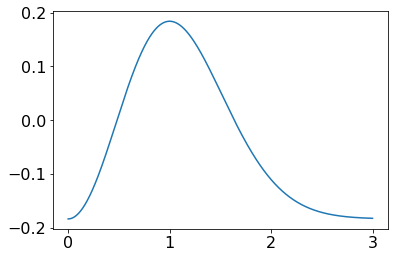

In [11]:
u= np.linspace(0,3,100000)
plt.plot(u,h(u))

In [12]:
result_d_1 = root_scalar(h,x0=0,x1=1)
print(result_d_1)

      converged: True
           flag: 'converged'
 function_calls: 6
     iterations: 5
           root: 0.4816232479713991


In [13]:
result_d_2 = root_scalar(h,x0=1.5,x1=2)
print(result_d_2)

      converged: True
           flag: 'converged'
 function_calls: 7
     iterations: 6
           root: 1.6365656082224938


In [14]:
print(f'|u_W1-u_W2| = {result_d_2.root-result_d_1.root}')

|u_W1-u_W2| = 1.1549423602510946


In [15]:
def v_W(u_W,beta):
    return u_W/sqrt(beta)

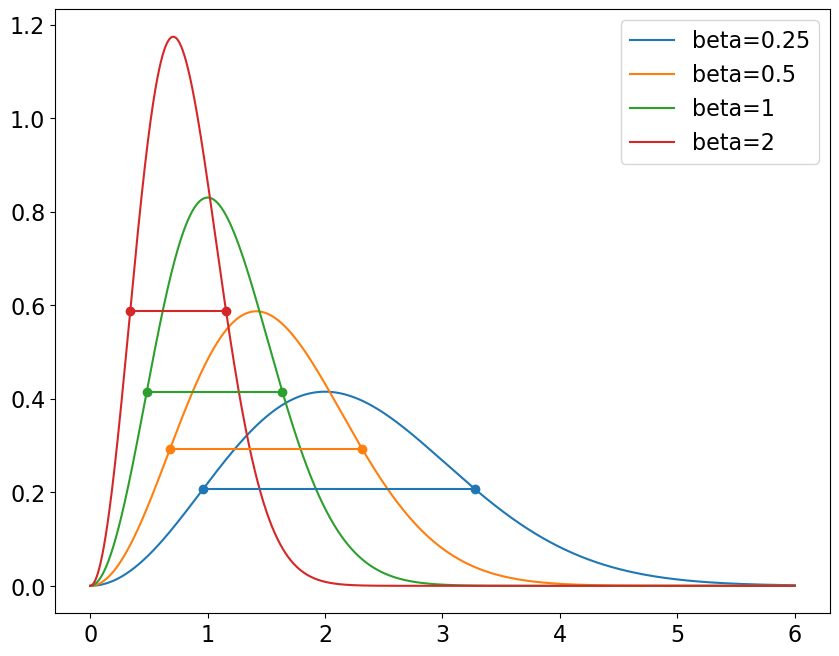

In [16]:
u_W = np.array([result_d_1.root,result_d_2.root])

plot_function()

for beta_i,color in zip(beta,colors):
    plt.plot(v_W(u_W,beta_i),f(v_W(u_W,beta_i),beta_i),marker='o',linestyle='-',color=color)